In [104]:
!pip install qutip

In [105]:
import qutip 
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [106]:
#Make a bell state
qt.bell_state("00")

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]]

print(qutip.basis(2, 0))
print (qutip.basis(2, 1))

<BarContainer object of 10 artists>

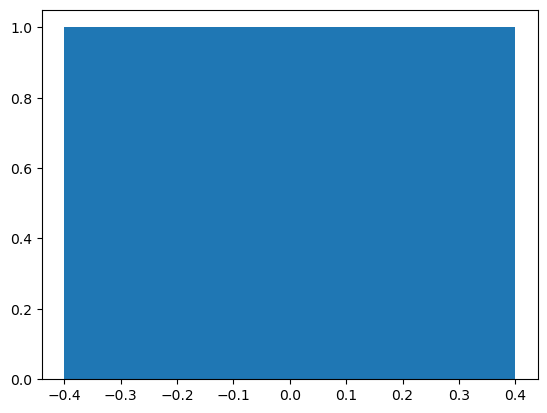

In [107]:
f0=qt.fock(10,0)

plt.bar([0],np.abs(f0.full().flatten())**2)

# Debugging


In [108]:
def photon_count(state: qutip.Qobj) -> int:
    """
    Computes the expectation value of the photon number operator ⟨n⟩.

    Parameters:
        state (qutip.Qobj): Quantum state.

    Returns:
        ???: Photon number expectation value.
    """
    return qutip.expect(qutip.num(10), state)  # Returns float!
     

In [109]:
photon_count(qutip.coherent(10, 1))


0.999999925936512

In [110]:

def create_fock_state(n: float, dims: int) -> qutip.Qobj:
    """
    Type enforcement prevents:
    create_fock_state(2.5, 10)  # Error: n must be integer!
    """
    return qutip.fock(dims, n)
     



     

In [111]:
create_fock_state(2, 10) #Changed dimension to int

Quantum object: dims=[[10], [1]], shape=(10, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Testing the fixed function

In [112]:
def create_coherent_state(alpha: complex, dimension: int) -> Qobj:
    """
    Creates a coherent state |α⟩ using QuTiP.

    Parameters:
        alpha (complex): Complex displacement parameter.
        dimension (int): Hilbert space size.

    Returns:
        qutip.Qobj: The coherent state |α⟩.
    """
    return qutip.coherent(dimension, alpha)

def photon_number_expectation(state: Qobj) -> float:
    """
    Computes the expectation value of the photon number operator ⟨n⟩.

    Parameters:
        state (qutip.Qobj): Quantum state.

    Returns:
        float: Photon number expectation value.
    """
    # Extract the dimension as an integer
    dimension = state.dims[0][0]
    return qutip.expect(qutip.num(dimension), state)

In [113]:
alpha = 1.0 + 1.0j
dimension = 10
state = create_coherent_state(alpha, dimension)
expectation_value = photon_number_expectation(state)
print("Photon number expectation value:", expectation_value)

Photon number expectation value: 1.99996117175533


# Fock States

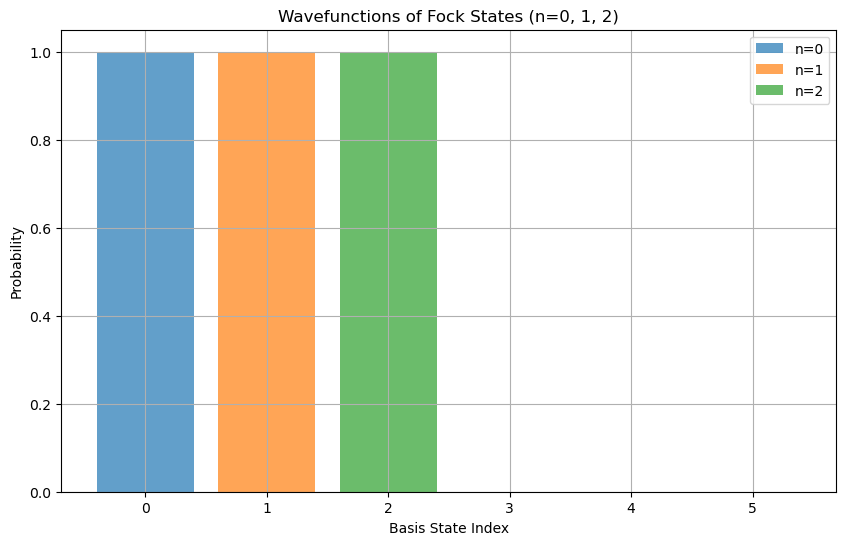

In [114]:
# Create Fock states for n=0, 1, 2
n_values = [0, 1, 2]
dimension = 6  # Define the Hilbert space dimension
fock_states = [qutip.fock(dimension, n) for n in n_values]

# Plot the wavefunctions
plt.figure(figsize=(10, 6))
for i, state in enumerate(fock_states):
    probabilities = np.abs(state.full().flatten())**2  # Compute probabilities
    plt.bar(range(len(probabilities)), probabilities, alpha=0.7, label=f"n={n_values[i]}")

plt.xlabel("Basis State Index")
plt.ylabel("Probability")
plt.title("Wavefunctions of Fock States (n=0, 1, 2)")
plt.legend()
plt.grid()
plt.show()

# Coherent States

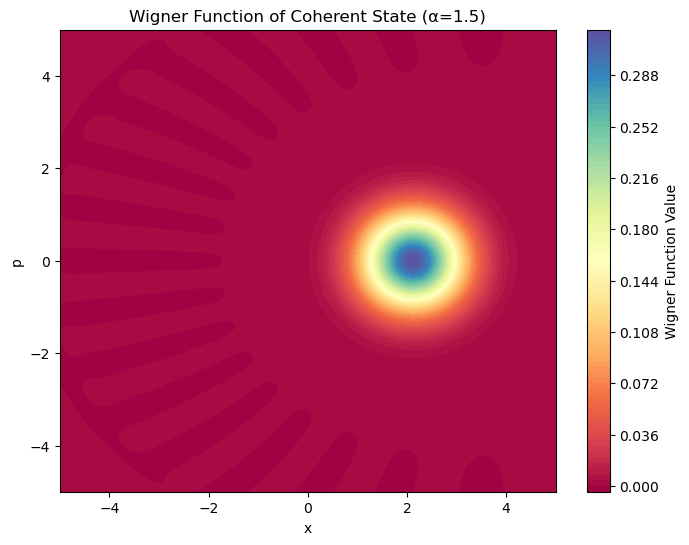

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import qutip

# Generate the coherent state
alpha = 1.5
dimension = 20  # Define the Hilbert space dimension
coherent_state = create_coherent_state(alpha, dimension)

# Plot Wigner function
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = qutip.wigner(coherent_state, x, y)

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, 100, cmap="Spectral")
plt.colorbar(contour, label="Wigner Function Value")
plt.xlabel("x")
plt.ylabel("p")
plt.title("Wigner Function of Coherent State (α=1.5)")
plt.grid(False)
plt.show()

# Squeezed States

In [116]:
# Generate the vacuum Fock state (n=0)
vacuum_fock_state = qutip.fock(dimension, 0)

# Define the squeezing parameter
squeezing_parameter = 1.4

# Generate the squeezed state
squeezed_state = qutip.squeeze(dimension, squeezing_parameter) * vacuum_fock_state

# Display the states
print("Vacuum Fock State:")
print(vacuum_fock_state)

print("\nSqueezed State:")
print(squeezed_state)

Vacuum Fock State:
Quantum object: dims=[[20], [1]], shape=(20, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Squeezed State:
Quantum object: dims=[[20], [1]], shape=(20, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.68180389]
 [ 0.        ]
 [-0.42758737]
 [ 0.        ]
 [ 0.32330548]
 [ 0.        ]
 [-0.277077  ]
 [ 0.        ]
 [ 0.19259585]
 [ 0.        ]
 [-0.22582296]
 [ 0.        ]
 [ 0.1010367 ]
 [ 0.        ]
 [-0.19841525]
 [ 0.        ]
 [ 0.04044538]
 [ 0.        ]
 [-0.1780797 ]
 [ 0.        ]]


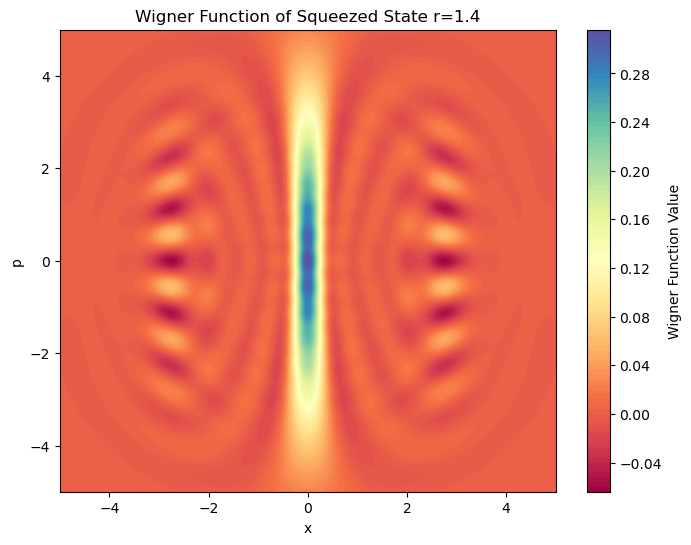

In [117]:
# Plot Wigner function
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = qutip.wigner(squeezed_state, x, y)

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, 100, cmap="Spectral")
plt.colorbar(contour, label="Wigner Function Value")
plt.xlabel("x")
plt.ylabel("p")
plt.title(f"Wigner Function of Squeezed State r={squeezing_parameter}")
plt.grid(False)
plt.show()

## LLM Prompt Engineering Practice

In [118]:
pip install strawberryfields

Note: you may need to restart the kernel to use updated packages.


# Generalizing the Code to work with more particles

Homodyne measurement results (one row per sample, one column per mode):
[[-2.63947908 -0.13828727 -0.42207684  0.96587208]]
Phase shift applied to modes: [2, 0, 1, 3]


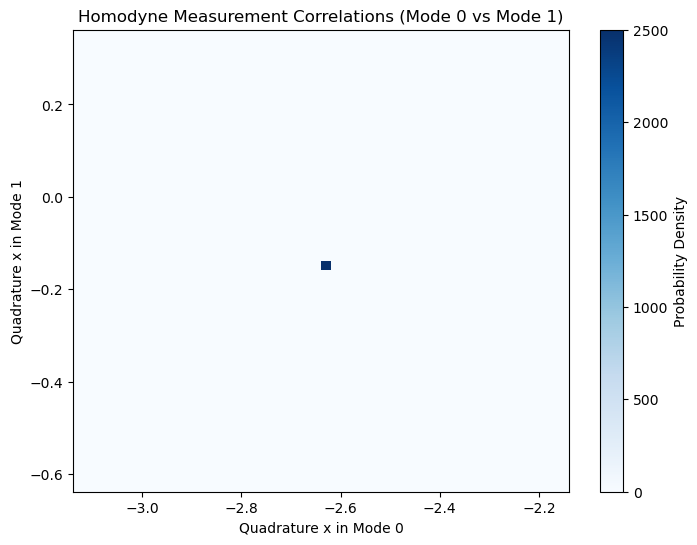

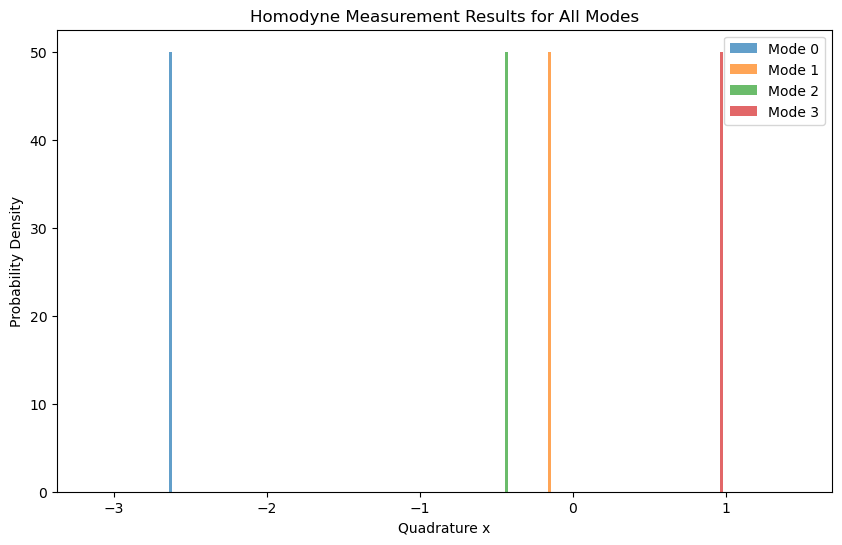

'Graph 1 (2D Histogram): Shows how the measurements of two modes (Mode 0 and Mode 1) are related. Correlations in this graph indicate entanglement.\nGraph 2 (Individual Histograms): Shows the measurement results for each mode separately. The shape of these distributions reflects the squeezing and phase shifts applied to the modes.'

In [119]:
"""Prompt: Generate a Quantum Circuit that entangles  particles using a beam splitter and phase shifter. 
The circuit should include a squeezing operation on the input states and perform homodyne detection on the output states.  
Finally, visualize the results using histograms."""

import strawberryfields as sf
from strawberryfields.ops import Sgate, BSgate, Rgate, MeasureHomodyne
import matplotlib.pyplot as plt
import numpy as np
import random

# Ask the user for input
n_modes = int(input("Enter the number of modes (e.g., 4): "))  # Number of modes
r = float(input("Enter the squeezing parameter (e.g., 0.7): "))  # Squeezing parameter
phi = float(input("Enter the phase shift in radians (e.g., 1.5708 for π/2): "))  # Phase shift

# Initialize a quantum photonic circuit with the specified number of modes
prog = sf.Program(n_modes)

# Randomly select modes to apply the phase shift
modes_with_phase_shift = random.sample(range(n_modes), k=random.randint(1, n_modes))

# Define the circuit
with prog.context as q:
    # Apply squeezing to all modes
    for i in range(n_modes):
        Sgate(r) | q[i]
    
    # Apply beamsplitters to entangle the modes
    for i in range(n_modes - 1):
        BSgate() | (q[i], q[i + 1])
    
    # Apply phase shifts to randomly selected modes
    for i in modes_with_phase_shift:
        Rgate(phi) | q[i]
    
    # Perform Homodyne Detection on all modes
    for i in range(n_modes):
        MeasureHomodyne(0) | q[i]  # Measure the position quadrature (x)

# Run the circuit on the Strawberry Fields Gaussian backend
eng = sf.Engine("gaussian")  # Use the Gaussian backend for Homodyne Detection
results = eng.run(prog)

# Extract Homodyne measurement results
homodyne_results = results.samples

# Display the Homodyne measurement results
print("Homodyne measurement results (one row per sample, one column per mode):")
print(homodyne_results)

# Display which modes had the phase shift applied
print(f"Phase shift applied to modes: {modes_with_phase_shift}")

# Visualize the Homodyne measurement results
# Create a 2D histogram for the first two modes
if n_modes >= 2:
    plt.figure(figsize=(8, 6))
    plt.hist2d(homodyne_results[:, 0], homodyne_results[:, 1], bins=(50, 50), cmap="Blues", density=True)
    plt.colorbar(label="Probability Density")
    plt.xlabel("Quadrature x in Mode 0")
    plt.ylabel("Quadrature x in Mode 1")
    plt.title("Homodyne Measurement Correlations (Mode 0 vs Mode 1)")
    plt.show()

# Visualize the quadrature measurements for all modes
plt.figure(figsize=(10, 6))
for i in range(n_modes):
    plt.hist(homodyne_results[:, i], bins=50, alpha=0.7, label=f"Mode {i}", density=True)
plt.xlabel("Quadrature x")
plt.ylabel("Probability Density")
plt.title("Homodyne Measurement Results for All Modes")
plt.legend()
plt.show()

"""Graph 1 (2D Histogram): Shows how the measurements of two modes (Mode 0 and Mode 1) are related. Correlations in this graph indicate entanglement.
Graph 2 (Individual Histograms): Shows the measurement results for each mode separately. The shape of these distributions reflects the squeezing and phase shifts applied to the modes."""

Closing Remarks: 
* The code was adjusted to allow for user input on number of states, squeezing parameter, and phase shift. 
    * Note: number of particles in these states must be limited to under 10, for the sake of limited computational resources. 
* The phase was applied to a random amount of the particles as all of the particles passing through the phase would be recoded and no phase change at all; phase of one particle is relative to the phase of another particle.
* This code help me visualize the processes I learned to do in my Quantum Mechanics class without the tedious matrix calculations.